IBM_312 Group Assignment
You Tube Spam Comments Detection and Sentiment Analysis of non-spam Comments
By-
Deepak Sharma and
Yash Bhanushali

In [1]:
import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
import string
import os
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Youtube01-Psy.csv') #read the CSV file

In [3]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [4]:
column = ['COMMENT_ID','AUTHOR','DATE']
df.drop(columns = column,inplace=True)
df.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [5]:
df.CLASS.value_counts()

1    175
0    175
Name: CLASS, dtype: int64

In [6]:
df.shape

(350, 2)

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(349, 2)

In [8]:
df.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [9]:
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [10]:
sent1 = "Subject: why is this"
sent2 = re.sub("Subject:","",sent1)
tokens = word_tokenize(sent1.lower())


In [11]:
def clean_txt(sent):    
    #Stripping white spaces before and after the text
    sent = sent.strip()
    #Replacing multiple spaces with a single space
    result = re.sub("\s+", " ", sent)
    result = re.sub("Subject:","",result)
    #Replacing Non-Alpha-numeric and non space charecters with nothing
    result = re.sub("[^\w\s]","",result)
    
    tokens = word_tokenize(result.lower())
    stop_updated = stopwords.words("english")  +  ["would", "could","told"]
    text = [term for term in tokens if term not in stop_updated and len(term) > 2] 
    res = " ".join(text)
    return res

In [12]:
df['ctext'] = df.CONTENT.apply(clean_txt)

In [13]:
df.head()

,CONTENT,CLASS,ctext
0,"Huh, anyway check out this you[tube] channel: ...",1,huh anyway check youtube channel kobyoshi02
1,Hey guys check out my new channel and our firs...,1,hey guys check new channel first vid monkeys m...
2,just for test I have to say murdev.com,1,test say murdevcom
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,shaking sexy ass channel enjoy
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watchvvtarggvgtwq check


In [14]:
X_text = df.ctext.values
y = df.CLASS.values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size = 0.20, random_state=311)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=941)
X_trainmat = tfidf_vectorizer.fit_transform(X_train)

In [17]:
y.sum()

175

In [18]:
y_train.sum()

140

In [19]:
X_trainmat.toarray()

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0.5, 0.5, 0.5],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

USING SVM Linear kernel

In [20]:
from sklearn.svm import SVC
classify = SVC(kernel= 'linear')
classify.fit(X_trainmat.toarray(), y_train)

SVC(kernel='linear')

In [21]:
X_testmat = tfidf_vectorizer.transform(X_test)

In [22]:
y_pred = classify.predict(X_testmat.toarray())

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score

In [24]:
accuracy_score(y_test,y_pred)

0.8714285714285714

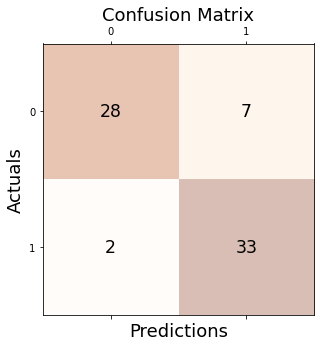

In [25]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [26]:
	
print('Precision: %.3f' % precision_score(y_test, y_pred))
	
print('Recall: %.3f' % recall_score(y_test, y_pred))
	
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.825
Recall: 0.943
F1 Score: 0.880


In [27]:
y_predtrain = classify.predict(X_trainmat.toarray())

In [28]:
accuracy_score(y_train,y_predtrain)

1.0

In [29]:
confusion_matrix(y_train,y_predtrain)

array([[139,   0],
       [  0, 140]], dtype=int64)

In [30]:
confusion_matrix(y_test,y_pred)

array([[28,  7],
       [ 2, 33]], dtype=int64)

Using Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size = 0.20, random_state=2505)
classifier = LogisticRegression()

In [32]:
classifier.fit(X_trainmat.toarray(), y_train)

LogisticRegression()

In [33]:
y_pred = classifier.predict(X_testmat)

In [34]:
accuracy_score(y_test,y_pred)

0.5

In [35]:
confusion_matrix(y_test,y_pred)

array([[15, 16],
       [19, 20]], dtype=int64)

In [36]:
y_predtrain = classifier.predict(X_trainmat)

In [37]:
accuracy_score(y_train,y_predtrain)

0.9390681003584229

Actual project or applying the trained model on our project dataset 


In [38]:
df2 = pd.read_csv('comments_dataset.csv')
df2.head()

,videoId,textDisplay,textOriginal,parentId,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId,canRate,viewerRating,likeCount,publishedAt,updatedAt,commentId
0,kX3nB4PpJko,Hi,Hi,UgycNFzwlYlQB2bKNOV4AaABAg,Lebron,https://yt3.ggpht.com/VwaM-feRzjHukiZs7q845WyJ...,http://www.youtube.com/channel/UCimAkW0digxXwB...,{'value': 'UCimAkW0digxXwBLVt7p0xYg'},True,none,0,2022-11-22T16:59:08Z,2022-11-22T16:59:08Z,UgycNFzwlYlQB2bKNOV4AaABAg.9iLZx5BVUrq9ijq1yGuiBA
1,kX3nB4PpJko,WHERE CAN YOU FIND BEAST BURGER IMEED TO KMOW!...,WHERE CAN YOU FIND BEAST BURGER IMEED TO KMOW!...,UgycNFzwlYlQB2bKNOV4AaABAg,Norabaka,https://yt3.ggpht.com/ACIoNdUG5FIrQY1A64Lm2Klj...,http://www.youtube.com/channel/UC5tWZwAhxPB5So...,{'value': 'UC5tWZwAhxPB5SoatAVDvvZQ'},True,none,0,2022-11-16T21:22:28Z,2022-11-16T21:22:28Z,UgycNFzwlYlQB2bKNOV4AaABAg.9iLZx5BVUrq9iVrPNTgmYp
2,kX3nB4PpJko,❤️❤️❤️,❤️❤️❤️,UgycNFzwlYlQB2bKNOV4AaABAg,Faisal Ahmed,https://yt3.ggpht.com/ytc/AMLnZu8UcnceoPC1dZAX...,http://www.youtube.com/channel/UC7QNPKPXzNI88a...,{'value': 'UC7QNPKPXzNI88amrVKhB01Q'},True,none,1,2022-11-13T08:04:56Z,2022-11-13T08:04:56Z,UgycNFzwlYlQB2bKNOV4AaABAg.9iLZx5BVUrq9iMhkP68H6V
3,kX3nB4PpJko,IGHT,IGHT,UgycNFzwlYlQB2bKNOV4AaABAg,Minecraft Missionary,https://yt3.ggpht.com/ytc/AMLnZu8oVIzgCvBMJ2fn...,http://www.youtube.com/channel/UCwcx5cjUNflz5Q...,{'value': 'UCwcx5cjUNflz5Q7NrW4psjw'},True,none,0,2022-11-12T22:56:28Z,2022-11-12T22:56:28Z,UgycNFzwlYlQB2bKNOV4AaABAg.9iLZx5BVUrq9iLizMfi886
4,kX3nB4PpJko,Hola,Hola,UgycNFzwlYlQB2bKNOV4AaABAg,FREN,https://yt3.ggpht.com/MaUAo6TC2Rh2RaMQh3eiSUqs...,http://www.youtube.com/channel/UCK9_bFIW8l3AYN...,{'value': 'UCK9_bFIW8l3AYNyy4ErHiXg'},True,none,0,2022-11-12T22:56:27Z,2022-11-12T22:56:27Z,UgycNFzwlYlQB2bKNOV4AaABAg.9iLZx5BVUrq9iLizFW4sRH


In [39]:
del_column = ['videoId' , 'textOriginal', 'parentId', 'authorProfileImageUrl', 'authorChannelId', 'canRate', 'viewerRating', 'publishedAt', 'updatedAt', 'commentId']
df2.drop(columns = del_column,inplace = True)
df2.head()

,textDisplay,authorDisplayName,authorChannelUrl,likeCount
0,Hi,Lebron,http://www.youtube.com/channel/UCimAkW0digxXwB...,0
1,WHERE CAN YOU FIND BEAST BURGER IMEED TO KMOW!...,Norabaka,http://www.youtube.com/channel/UC5tWZwAhxPB5So...,0
2,❤️❤️❤️,Faisal Ahmed,http://www.youtube.com/channel/UC7QNPKPXzNI88a...,1
3,IGHT,Minecraft Missionary,http://www.youtube.com/channel/UCwcx5cjUNflz5Q...,0
4,Hola,FREN,http://www.youtube.com/channel/UCK9_bFIW8l3AYN...,0


In [40]:
x = df2['textDisplay']
x

0                                                       Hi
1        WHERE CAN YOU FIND BEAST BURGER IMEED TO KMOW!...
2                                                   ❤️❤️❤️
3                                                     IGHT
4                                                     Hola
                               ...                        
18357                                             I subbed
18358                                           noooo sped
18359    I won&#39;t do that challenges and I know cuz ...
18360       A twist: Try to have them blind fold as well 😂
18361                                                   Hi
Name: textDisplay, Length: 18362, dtype: object

In [41]:
x_trainmat = tfidf_vectorizer.fit_transform(x)


In [42]:
y2 = classify.predict(x_trainmat.toarray())   #USING SVM as classifier 

In [43]:
df2['spam']=y2
df2.head(25)

,textDisplay,authorDisplayName,authorChannelUrl,likeCount,spam
0,Hi,Lebron,http://www.youtube.com/channel/UCimAkW0digxXwB...,0,1
1,WHERE CAN YOU FIND BEAST BURGER IMEED TO KMOW!...,Norabaka,http://www.youtube.com/channel/UC5tWZwAhxPB5So...,0,1
2,❤️❤️❤️,Faisal Ahmed,http://www.youtube.com/channel/UC7QNPKPXzNI88a...,1,1
3,IGHT,Minecraft Missionary,http://www.youtube.com/channel/UCwcx5cjUNflz5Q...,0,1
4,Hola,FREN,http://www.youtube.com/channel/UCK9_bFIW8l3AYN...,0,1
5,Me besaste es lo mejor,NOEL MATHIAS,http://www.youtube.com/channel/UCC9BKF4FDyC0dd...,0,1
6,Yes i love this guy kets go harry❤❤,CRYPTO,http://www.youtube.com/channel/UCeYsd-jG5fwHao...,0,0
7,Speed is crazy😂,JailyneTutu,http://www.youtube.com/channel/UCkuRjX2lyxW49r...,0,1
8,ليش وتتوزع ١٠٠ حساب ماينكرافت وأاني تطيني أول...,Gfv Hbvg,http://www.youtube.com/channel/UCeN_XYb6tW87Qm...,0,1
9,Vivo en costarica en pasifico en las ultima de...,el masmalo,http://www.youtube.com/channel/UCBq2vNbb5UBMvf...,0,1


In [44]:
df2.spam.value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1        1
2        1
3        1
4        1
        ..
18357    0
18358    0
18359    1
18360    1
18361    1
Name: spam, Length: 18362, dtype: int64>

In [45]:
df2.to_csv('comments_datasetwithspam.csv') 
#Making a dataset hacing a spam
# column which tells if a particular comment is spam or not (1 is spam and 0 is not spam)

In [46]:
df2=df2.loc[df2['spam']==0] #Removing all spam comments from dataset
df2.head()

,textDisplay,authorDisplayName,authorChannelUrl,likeCount,spam
6,Yes i love this guy kets go harry❤❤,CRYPTO,http://www.youtube.com/channel/UCeYsd-jG5fwHao...,0,0
24,C&#39;est un attrape nigaud...personne ne peut...,Papillon Fr,http://www.youtube.com/channel/UCkUfc6uvlt8FMy...,0,0
31,Y este doblaje😓,franco mendoza,http://www.youtube.com/channel/UCWrHfn9O0tmVDe...,0,0
33,Your in fall guys,Ava games and more,http://www.youtube.com/channel/UCToR9_mzJpSBy5...,0,0
34,you beat pewdiepie by 2 million,Генерал Гавс,http://www.youtube.com/channel/UCfDlqbVzQAtcpB...,0,0


In [47]:
df1 = df2['textDisplay']
df1.to_csv('Non_Spam_Comments.csv') #finally making our dataset having non-spam comments only.
#

Performing Sentiment Analysis on the latest dataset i.e. Non-Spam_Comments.

In [48]:
import nltk

In [49]:
comments = pd.read_csv("Non_Spam_Comments.csv")
comments.head()

,Unnamed: 0,textDisplay
0,6,Yes i love this guy kets go harry❤❤
1,24,C&#39;est un attrape nigaud...personne ne peut...
2,31,Y este doblaje😓
3,33,Your in fall guys
4,34,you beat pewdiepie by 2 million


In [50]:
from wordcloud import WordCloud
comments_combined = " ".join(comments.textDisplay.values)
# comments_combined

word_cloud = WordCloud().generate_from_text(comments_combined)

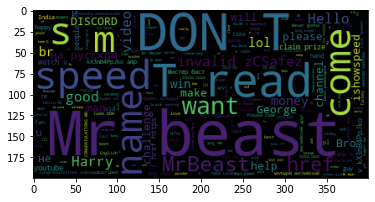

In [51]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [52]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=100, random_state = 10922, stopwords = None).\
generate_from_text(comments_combined)

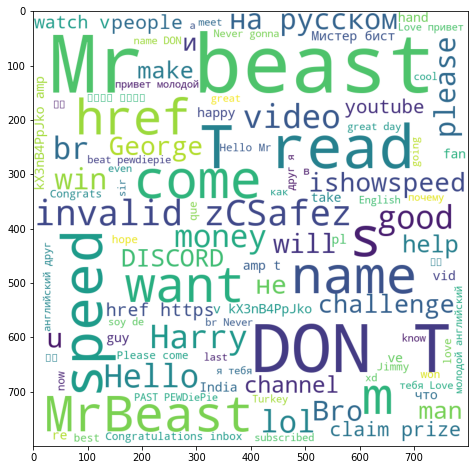

In [53]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [54]:
from nltk.tokenize import word_tokenize
all_terms = word_tokenize(comments_combined.lower())
print(all_terms[:20])

['yes', 'i', 'love', 'this', 'guy', 'kets', 'go', 'harry❤❤', 'c', '&', '#', '39', ';', 'est', 'un', 'attrape', 'nigaud', '...', 'personne', 'ne']


In [55]:
from string import punctuation
from nltk.corpus import stopwords

In [56]:
stop_nltk = stopwords.words("english")
stop_updated = stop_nltk + list(punctuation) + ["'s","..","...","...."]+["invalid", "congratulations","name","mr","beast", "claim","href"]

In [57]:
allterms1 = [word for word in all_terms if word not in stop_updated and len(word) >= 2]
print(allterms1 [:20])

['yes', 'love', 'guy', 'kets', 'go', 'harry❤❤', '39', 'est', 'un', 'attrape', 'nigaud', 'personne', 'ne', 'peut', 'dépenser', 'autant', '39', 'argent', 'dans', 'des']


In [58]:
allterms1string = " ".join(allterms1)
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=50, random_state = 109, stopwords = None).\
generate_from_text(allterms1string)

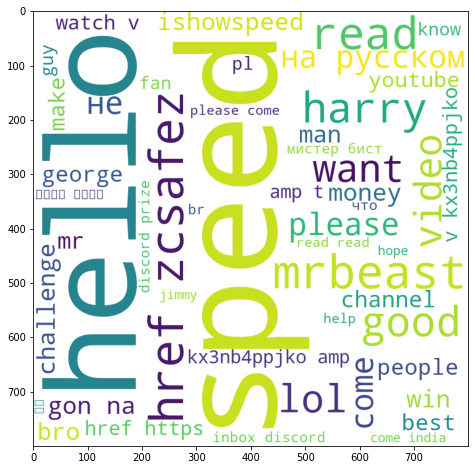

In [59]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [60]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10060] A connection attempt failed because the
[nltk_data]     connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>


In [61]:
negative=0
for i in comments['textDisplay']:
    #print(analyzer.polarity_scores(i)['compound'])
    if analyzer.polarity_scores(i)['compound'] < 0:
        negative=negative+1


In [62]:
positive = 0
for i in comments['textDisplay']:
    #print(analyzer.polarity_scores(i)['compound'])
    if analyzer.polarity_scores(i)['compound'] > 0:
        positive=positive+1


In [63]:
neutral = 0
for i in comments['textDisplay']:
    #print(analyzer.polarity_scores(i)['compound'])
    if analyzer.polarity_scores(i)['compound'] == 0:
        neutral=neutral+1


In [64]:
print('Positive: ',positive)
print('Negative: ',negative)
print('Neutral: ',neutral)

Positive:  1655
Negative:  481
Neutral:  2714


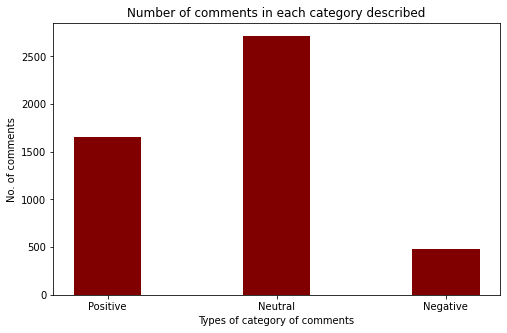

In [68]:
data = {'Positive':1655, 'Neutral':2714, 'Negative':481}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Types of category of comments")
plt.ylabel("No. of comments")
plt.title("Number of comments in each category described")
plt.show()